In [58]:
from langchain_openai import ChatOpenAI
import os
from dotenv import load_dotenv


load_dotenv()
api_key = os.getenv("OPENAI_API_KEY")


llm = ChatOpenAI(openai_api_key=api_key, max_tokens=100, temperature=1)

In [59]:
from langchain_core.prompts import ChatPromptTemplate

prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a CPTSD Therapist with 20 plus years experience in healing people from CPTSD."),
    ("user", "{input}"),
    
])

chain = prompt | llm


In [60]:
from langchain_core.output_parsers import StrOutputParser

output_parser = StrOutputParser()
chain = chain | output_parser


In [61]:
import pdfplumber

def get_and_update_current_page(file_path, increment=2):
    try:
        with open(file_path, 'r') as file:
            current_page = int(file.read().strip())
    except FileNotFoundError:
        current_page = 0 

    new_current_page = current_page + increment

    with open(file_path, 'w') as file:
        file.write(str(new_current_page))

    return current_page, new_current_page

# Function to extract text from a specific section of the PDF
def extract_section_from_pdf(pdf_path, start_page, end_page):
    text = ""
    with pdfplumber.open(pdf_path) as pdf:
        pages = pdf.pages[start_page:end_page]
        for page in pages:
            text += page.extract_text() + "\n"
    return text

# File to store current page number
current_page_file = 'current_page.txt'

start_page, next_start_page = get_and_update_current_page(current_page_file)


# Extract text from today's section
pdf_text = extract_section_from_pdf("CPTSD.pdf", start_page, next_start_page)

response = chain.invoke({"input": "write a 20 words supportive quote for a person suffering from cptsd that would heal them, from the following text" + pdf_text})

print(response)

quote=response

"You have the power to heal and reclaim your body from the damage of CPTSD. Embrace somatic practices and self-compassion."


In [62]:
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain_community.utilities.dalle_image_generator import DallEAPIWrapper
from langchain_openai import OpenAI

quote= response
print(quote)
llm = OpenAI(temperature=0.9)


prompt_template = PromptTemplate(
    input_variables=["quote"], 
    template="Generate an artwork that symbolizes inner strength, resilience, and mental harmony: {quote}",
)

chain = LLMChain(llm=llm, prompt=prompt_template)


input_data = {"quote": quote}

prompt = chain.run(input_data)
print(prompt)

len(prompt)
max_length = 1000
if len(prompt) >= max_length:
    prompt = prompt[:max_length]

print(len(prompt))

image_url = DallEAPIWrapper().run(prompt)

print(image_url)


"You have the power to heal and reclaim your body from the damage of CPTSD. Embrace somatic practices and self-compassion."
 

Title: "Rise from Within"

The artwork depicts a person standing tall, with their head held high, surrounded by vibrant flowers and greenery. The background is a calm and serene blue, representing mental harmony. The person's body is made up of intricate patterns, representing the complexity of their inner strength and resilience.

At the center of their chest is a lotus flower, symbolizing the power to heal and rise above the effects of Complex Post-Traumatic Stress Disorder (CPTSD). The lotus emerges from dark and muddy waters, representing the journey of healing and overcoming difficult experiences.

The person's posture is confident and grounded, representing their inner strength and resilience. Their arms are extended outwards, with their palms facing up, symbolizing openness and receptiveness to somatic practices and self-compassion.

At the bottom of the

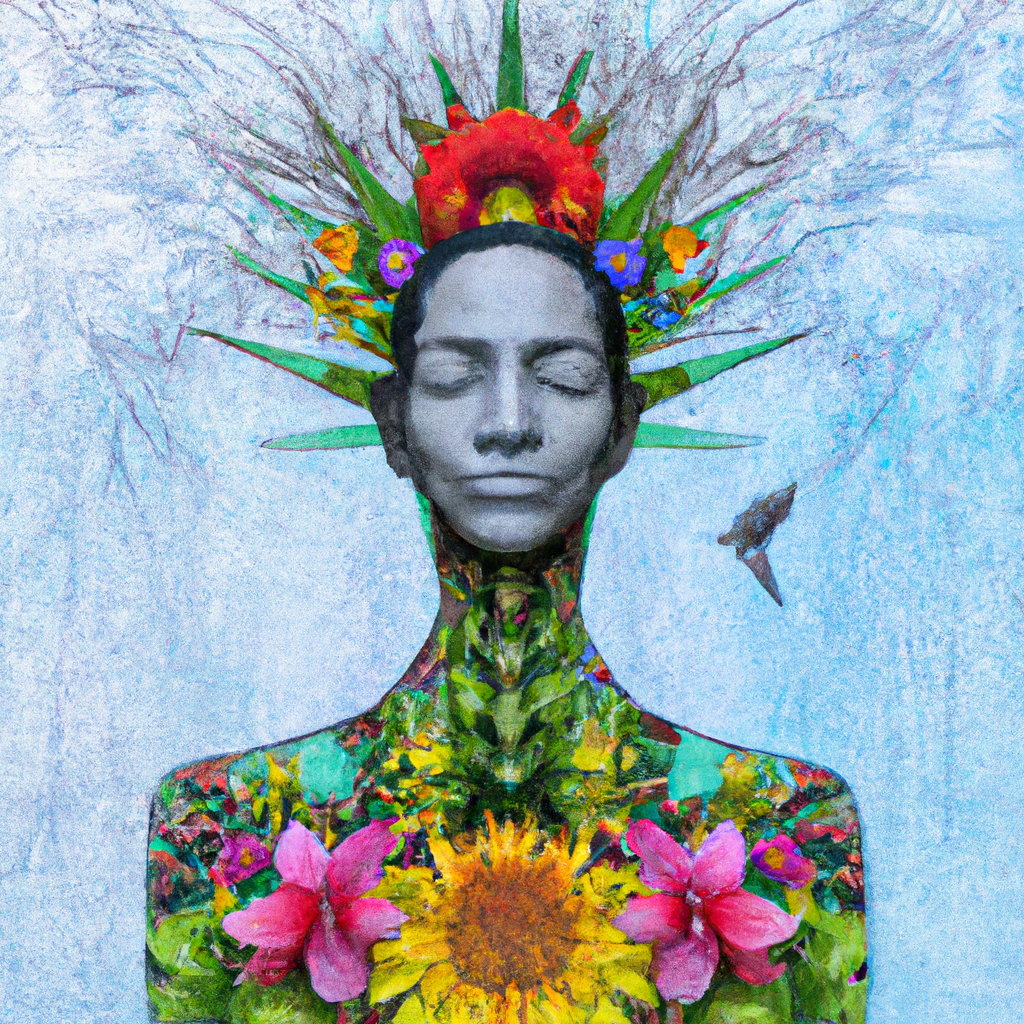

In [69]:
import requests
from PIL import Image
from io import BytesIO
from IPython.display import display
import datetime


response = requests.get(image_url)
image_data = BytesIO(response.content)
image = Image.open(image_data)

display(image)

current_time = datetime.datetime.now().strftime("%Y%m%d_%H%M%S%f")
filename = f"image_{current_time}.jpg"  
image.save("images/"+ filename)



In [64]:
print(prompt)

 

Title: "Rise from Within"

The artwork depicts a person standing tall, with their head held high, surrounded by vibrant flowers and greenery. The background is a calm and serene blue, representing mental harmony. The person's body is made up of intricate patterns, representing the complexity of their inner strength and resilience.

At the center of their chest is a lotus flower, symbolizing the power to heal and rise above the effects of Complex Post-Traumatic Stress Disorder (CPTSD). The lotus emerges from dark and muddy waters, representing the journey of healing and overcoming difficult experiences.

The person's posture is confident and grounded, representing their inner strength and resilience. Their arms are extended outwards, with their palms facing up, symbolizing openness and receptiveness to somatic practices and self-compassion.

At the bottom of the artwork, there are scattered puzzle pieces, representing the fragmented sense of self that often comes with CPTSD. However,

In [75]:
from PIL import Image, ImageDraw, ImageFont, ImageFilter
import textwrap
import datetime


def draw_multiline_text_with_frosted_background(image, text, position, font, text_color, shadow_color, shadow_offset, line_spacing=1.2):
    draw = ImageDraw.Draw(image)
    lines = textwrap.wrap(text, width=45)

    x, y = position
    shadow_x, shadow_y = shadow_offset

    # Estimate the size of the frosted background
    # Assuming average character width is roughly half the font size (a rough estimation)
    average_char_width = font.size // 1
    max_text_width = max(len(line) for line in lines) * average_char_width
    line_height = int(font.size * line_spacing)
    total_text_height = len(lines) * line_height

    frosted_background_size = (max_text_width + 20, total_text_height + 10)  # Extra padding
    frosted_background_position = (x - 1, y - 1)

    # Create frosted background (semi-transparent rectangle)
    frosted_background = Image.new("RGBA", frosted_background_size, (255, 255, 255, 180))
    image.paste(frosted_background, frosted_background_position, frosted_background)

    for line in lines:
     # Calculate x-coordinate to center the text within the frosted background
        text_bbox = draw.textbbox((0, 0), line, font=font)
        text_width = text_bbox[2] - text_bbox[0]
        x_centered = x + (max_text_width - text_width) / 6

  
        draw.text((x_centered + shadow_x, y + shadow_y), line, font=font, fill=shadow_color)
        
 
        draw.text((x_centered, y), line, font=font, fill=text_color)
        y += line_height  # Increment y position by line height


font_path = 'fonts/OpenSans-Italic.ttf'
my_font = ImageFont.truetype(font_path, 45)


shadow_color = "white"
shadow_offset = (2, 2)



draw_multiline_text_with_frosted_background(image, quote, (0, 100), my_font, 'black', shadow_color, shadow_offset)


current_time = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
filename = f"image_{current_time}.jpg"  


image.save("images/"+ filename)

display(image)

NameError: name 'frosted_background' is not defined